## 0. Regresión logística: teoría y ejemplo sintético

La regresión logística es un modelo de clasificación lineal que estima la probabilidad de que una muestra pertenezca a una clase. Para el caso binario, la probabilidad se modela con la *función sigmoide*:

$$
h_{\mathbf{\theta}}(\mathbf{x}) = \sigma(z) = \frac{1}{1 + e^{-z}},\quad z = \mathbf{\theta}^\top \mathbf{x} + b
$$



donde $\mathbf{x}$ es el vector de características (incluyendo un término de sesgo si se desea), $\mathbf{\theta}$ son los coeficientes del modelo y $b$ es el sesgo. La decisión final se obtiene comparando la probabilidad con un umbral (por defecto 0,5).

La función de costo utilizada para entrenar el modelo es la *log-loss* o entropía cruzada, que para un conjunto de $n$ ejemplos con etiquetas $y_i \in \{0,1\}$ se define como:

$$
J(\mathbf{\theta}, b) = -\frac{1}{n} \sum_{i=1}^{n}
\bigl[ y_i \log h_{\mathbf{\theta}}(\mathbf{x}_i) + (1 - y_i) \log (1 - h_{\mathbf{\theta}}(\mathbf{x}_i)) \bigr].
$$


El objetivo del entrenamiento es encontrar los parámetros $\mathbf{\theta}$ y $b$ que minimicen $J$.


### 0.1 Ejemplo con datos sintéticos en 2D

Este en un conjunto de datos sintéticos: datos bidimensionales con dos clases usando ``make_blobs`` de scikit-learn. Entrenamos un clasificador de regresión logística y visualizamos la región de decisión junto con los puntos de datos.

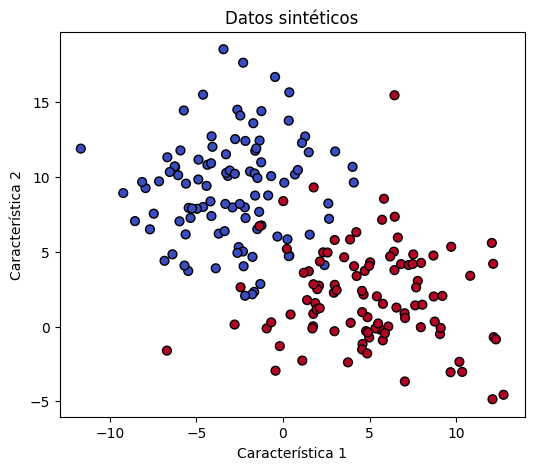

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Generar datos sintéticos
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=3.5, random_state=42)
# X, y = make_moons(n_samples=200, noise=0.2, random_state=42)


# Graficar región de decisión y puntos de datos
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap='coolwarm')
plt.title('Datos sintéticos')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

In [25]:
# Entrenar regresión logística
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [26]:
# Predicciones y exactitud
y_pred = clf.predict(X)
acc = accuracy_score(y, y_pred)
cm = confusion_matrix(y, y_pred)
print(f'Exactitud en los datos sintéticos: {acc:.3f}')
print('Matriz de confusión:')
print(cm)

Exactitud en los datos sintéticos: 0.925
Matriz de confusión:
[[92  8]
 [ 7 93]]


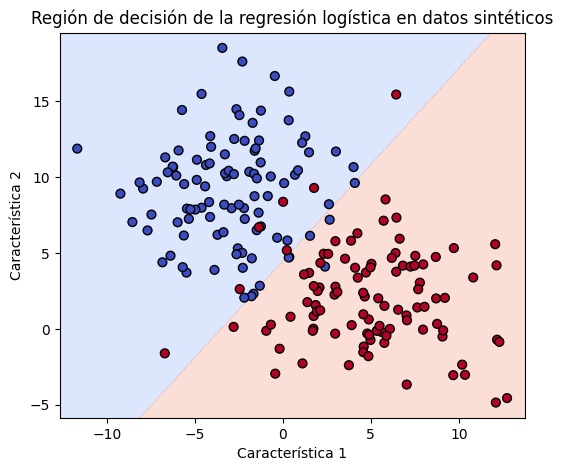

In [27]:
# Visualización de la región de decisión

# Crear una malla para visualizar la región de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar región de decisión y puntos de datos
plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.3, levels=1, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap='coolwarm')
plt.title('Región de decisión de la regresión logística en datos sintéticos')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()